# Run each scheme

Using this Notebook to test the module, so using IPy extension `autoreload`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

/usr/local/miniconda3/envs/py3d/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
%matplotlib notebook

## Test module import

In [3]:
import sys
sys.path.append('../')

In [4]:
%load_ext autoreload
%autoreload 1
%aimport crt1d

scheme IDs available: bl, 2s, 4s, zq, bf, gd
looking for necessary model input data in
    /Users/zmoon/gh/1D-canopy-rad/crt1d/data


In [5]:
import crt1d as crt

In [6]:
crt.model

crt1d.crt1d.model

In [7]:
import inspect
inspect.getfullargspec(crt.solvers.bl.solve_bl)

FullArgSpec(args=[], varargs=None, varkw=None, defaults=None, kwonlyargs=['psi', 'I_dr0_all', 'I_df0_all', 'wl', 'dwl', 'lai', 'leaf_t', 'leaf_r', 'green', 'K_b_fn'], kwonlydefaults=None, annotations={})

In [8]:
df_schemes = pd.DataFrame(crt.available_schemes).T

BL_args = set(a for a in df_schemes.loc[df_schemes.ID == 'bl'].args[0])
df_schemes['args_minus_BL'] = df_schemes['args'].apply(lambda x: set(x).symmetric_difference(BL_args))

df_schemes.drop(columns=['args', 'solver'])  # solver memory address not very informative

,module_name,ID,short_name,long_name,args_minus_BL
bl,bl,bl,B-L,Beer-Lambert,{}
2s,twos_ds,2s,2s,Dickinson–Sellers two-stream,"{mean_leaf_angle, soil_r, G_fn}"
4s,fours,4s,4s,four-stream,"{mu_s, soil_r, G_fn}"
zq,zq,zq,ZQ,Zhao & Qualls multi-scattering,"{soil_r, G_fn}"
bf,bf,bf,BF,Bodin & Franklin improved Goudriaan,{soil_r}
gd,gd,gd,Gou,Goudriaan,{soil_r}


### Load input data

In [9]:
schemes_to_test = ['bl', 'bf']#, '2s']

mi = dict(\
    wl=np.r_[0.55, 1.0], dwl=np.r_[0.3, 2], 
    leaf_r=np.r_[0.3, 0.3], leaf_t=np.r_[0.2, 0.2], soil_r=np.r_[0.1, 0.1],
    I_df0=np.r_[200, 100][np.newaxis,:], I_dr0=np.r_[1000, 500][np.newaxis,:],
    )
 

for scheme_ID in schemes_to_test:
    m = crt.model(scheme_ID, mi=mi)
    m.run()






scheme: bl
----------------------------------------

LAI vertical profile not provided. Using sample Gamma.

`green' not provided. Using default.

`mean_leaf_angle' not provided. Using default.

`clump' not provided. Using default.


----------------------------------------
now running the model...

it: 0



scheme: bf
----------------------------------------

LAI vertical profile not provided. Using sample Gamma.

`green' not provided. Using default.

`mean_leaf_angle' not provided. Using default.

`clump' not provided. Using default.


----------------------------------------
now running the model...

it: 0


<IPython.core.display.Javascript object>


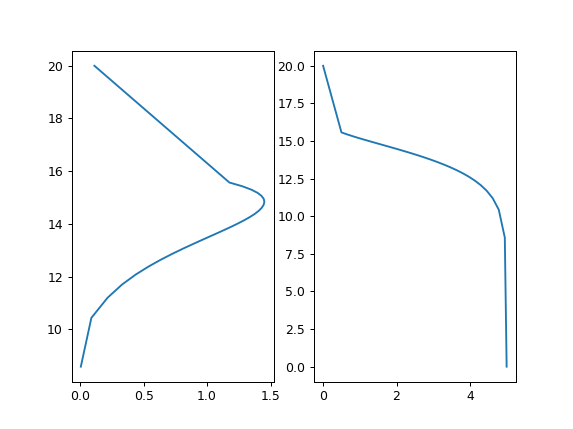

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.plot(-np.diff(m.lai)/np.diff(m.z), m.z[1:])
ax2.plot(m.lai, m.z)


In [11]:

iwl = 0

upwelling = m.I_df_u[0, -1, :]
incoming = m.I_df0 + m.I_dr0
tot_absorbed = incoming-upwelling

j = np.arange(1, m.lai.size)
jm1 = j-1
layerwise_absorbed = m.I_df_d[0,j,:] - m.I_df_d[0,jm1,:] + \
    m.I_df_u[0,jm1,:] - m.I_df_u[0,j,:] + m.I_dr[0,j,:] - m.I_dr[0,jm1,:] 

layerwise_sum = layerwise_absorbed.sum(axis=0)

print(incoming)
print(upwelling)
print(tot_absorbed)
print(layerwise_sum)

[1200  600]
[ 57.38731327 191.29104423]
[1142.61268673  408.70895577]
[229.2989507  764.32983566]


In [12]:
layerwise_absorbed

array([[ 1.24253562,  4.14178541],
       [ 4.23051975, 14.10173251],
       [ 4.44428002, 14.81426672],
       [ 4.66701922, 15.55673074],
       [ 4.89854046, 16.32846821],
       [ 5.13856952, 17.12856506],
       [ 5.3867418 , 17.95580599],
       [ 5.6425878 , 18.80862598],
       [ 5.90551682, 19.68505608],
       [ 6.17479887, 20.58266291],
       [ 6.44954437, 21.49848124],
       [ 6.72868162, 22.42893872],
       [ 7.01093161, 23.36977203],
       [ 7.29478005, 24.31593351],
       [ 7.57844613, 25.26148709],
       [ 7.85984777, 26.19949257],
       [ 8.13656306, 27.12187688],
       [ 8.40578728, 28.01929093],
       [ 8.66428517, 28.88095058],
       [ 8.90833801, 29.69446002],
       [ 9.1336847 , 30.44561567],
       [ 9.33545661, 31.1181887 ],
       [ 9.50810511, 31.69368371],
       [ 9.64532142, 32.15107139],
       [ 9.73994764, 32.46649214],
       [ 9.78387838, 32.61292792],
       [ 9.76795168, 32.55983894],
       [ 9.68182847, 32.27276157],
       [27.93446173,